<a href="https://colab.research.google.com/github/Anurag928/Data-Analysis-Projects/blob/main/Ecommerce_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

orders = pd.read_csv('/content/olist_orders_dataset.csv')
items = pd.read_csv('/content/olist_order_items_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')

In [ ]:
merged = orders.merge(items, on='order_id')
merged = merged.merge(products, on='product_id')
merged = merged.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')
merged['order_purchase_timestamp'] = pd.to_datetime(merged['order_purchase_timestamp'])


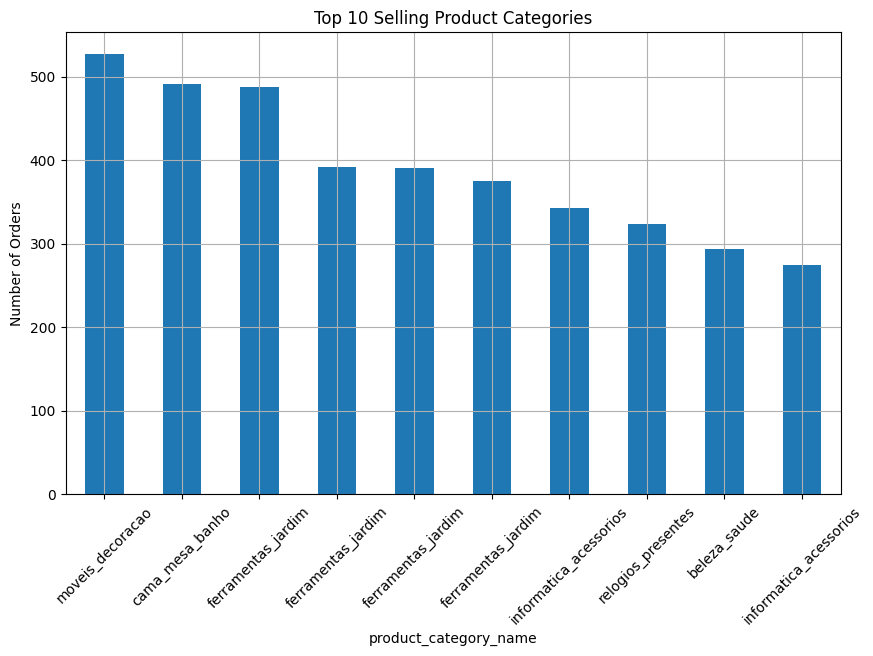

In [ ]:
import matplotlib.pyplot as plt

top_products = merged.groupby('product_id').agg({'order_item_id':'count'}).sort_values('order_item_id', ascending=False).head(10)
top_products = top_products.merge(products[['product_id', 'product_category_name']], on='product_id')
top_products.plot(x='product_category_name', y='order_item_id', kind='bar', figsize=(10,6), legend=False)
plt.title("Top 10 Selling Product Categories")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

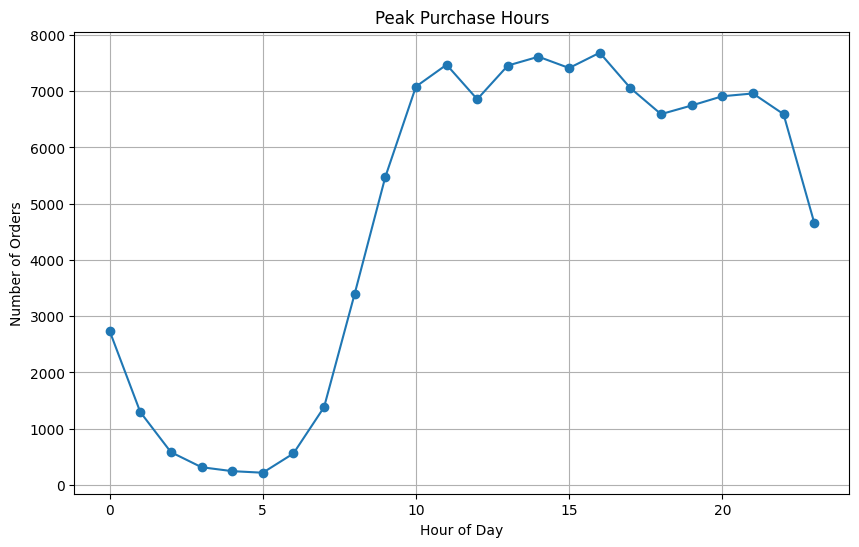

In [ ]:
merged['hour'] = merged['order_purchase_timestamp'].dt.hour
hourly_orders = merged.groupby('hour').order_id.count()
hourly_orders.plot(kind='line', marker='o', figsize=(10,6))
plt.title("Peak Purchase Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


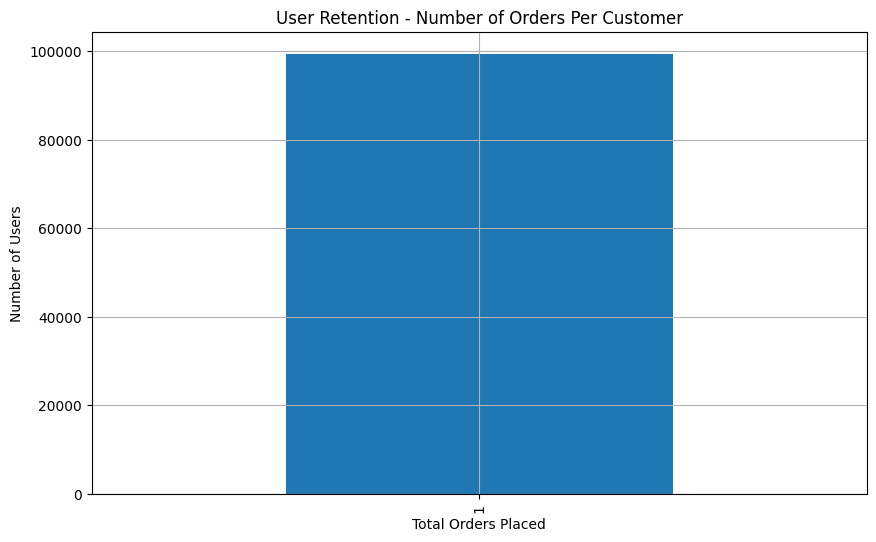

In [ ]:
customer_orders = orders.groupby('customer_id')['order_purchase_timestamp'].nunique()
retention_counts = customer_orders.value_counts().sort_index()
retention_counts.plot(kind='bar', figsize=(10,6))
plt.title("User Retention - Number of Orders Per Customer")
plt.xlabel("Total Orders Placed")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


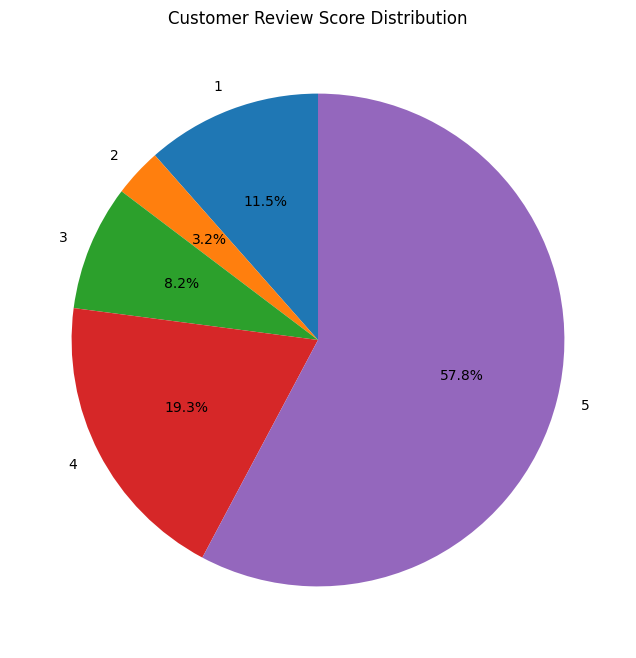

In [ ]:
review_summary = reviews['review_score'].value_counts().sort_index()
review_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=review_summary.index, figsize=(8,8))
plt.title("Customer Review Score Distribution")
plt.ylabel("")
plt.show()
